In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import joblib




In [2]:
data = pd.read_csv(r"C:\Users\Mala.VR\FraudDetectionProject\data\creditcard.csv")
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()
data.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.384974e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.494498e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.414189e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


C:\Users\Mala.VR\AppData\Local\Temp\ipykernel_22472\1346436128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='coolwarm')


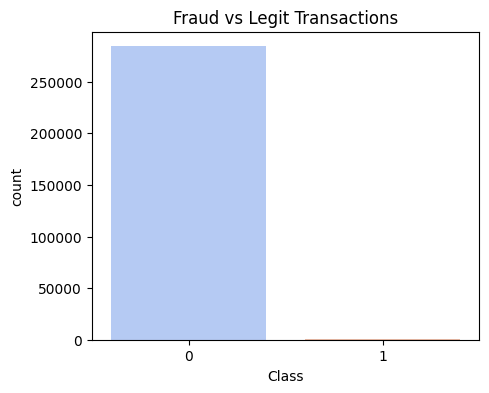

Fraudulent transactions: 0.173%


In [4]:
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=data, palette='coolwarm')
plt.title('Fraud vs Legit Transactions')
plt.show()

fraud_percent = (data['Class'].sum()/len(data))*100
print(f"Fraudulent transactions: {fraud_percent:.3f}%")


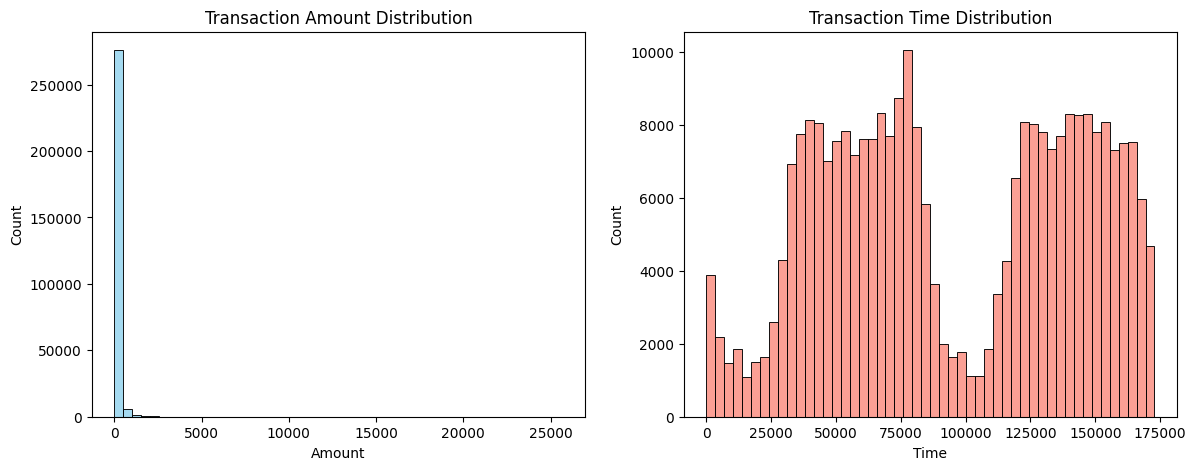

In [5]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
sns.histplot(data['Amount'], bins=50, ax=axes[0], color='skyblue')
axes[0].set_title('Transaction Amount Distribution')

sns.histplot(data['Time'], bins=50, ax=axes[1], color='salmon')
axes[1].set_title('Transaction Time Distribution')
plt.show()


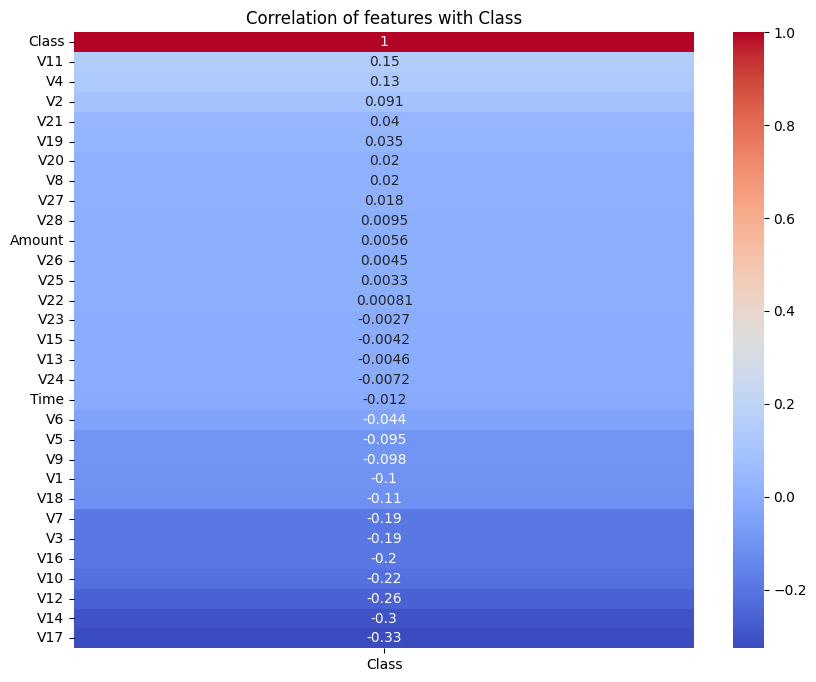

In [6]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of features with Class')
plt.show()


In [7]:
X = data.drop('Class', axis=1)
y = data['Class']

scaler = StandardScaler()
X[['Time','Amount']] = scaler.fit_transform(X[['Time','Amount']])
joblib.dump(scaler, '../src/scaler.joblib')


['../src/scaler.joblib']

In [8]:
import os
os.makedirs('../src', exist_ok=True)
joblib.dump(scaler, '../src/scaler.joblib')


['../src/scaler.joblib']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sm = SMOTE(random_state=42, sampling_strategy=0.3)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before:", y_train.value_counts().to_dict())
print("After:", pd.Series(y_train_res).value_counts().to_dict())


Before: {0: 227451, 1: 394}
After: {0: 227451, 1: 68235}


In [10]:
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

lr.fit(X_train_res, y_train_res)
rf.fit(X_train_res, y_train_res)
xgb_clf.fit(X_train_res, y_train_res)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9998    0.9919    0.9958     56864
           1     0.1603    0.8980    0.2720        98

    accuracy                         0.9917     56962
   macro avg     0.5801    0.9449    0.6339     56962
weighted avg     0.9984    0.9917    0.9946     56962



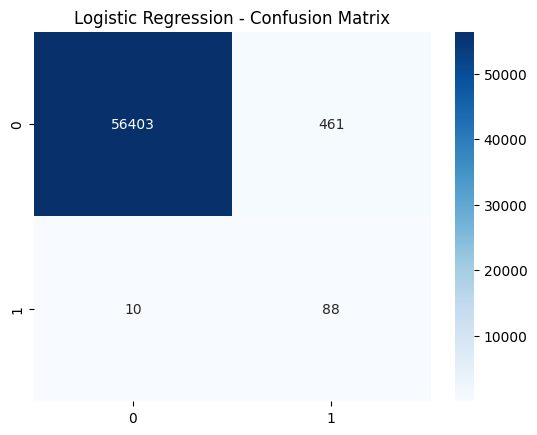

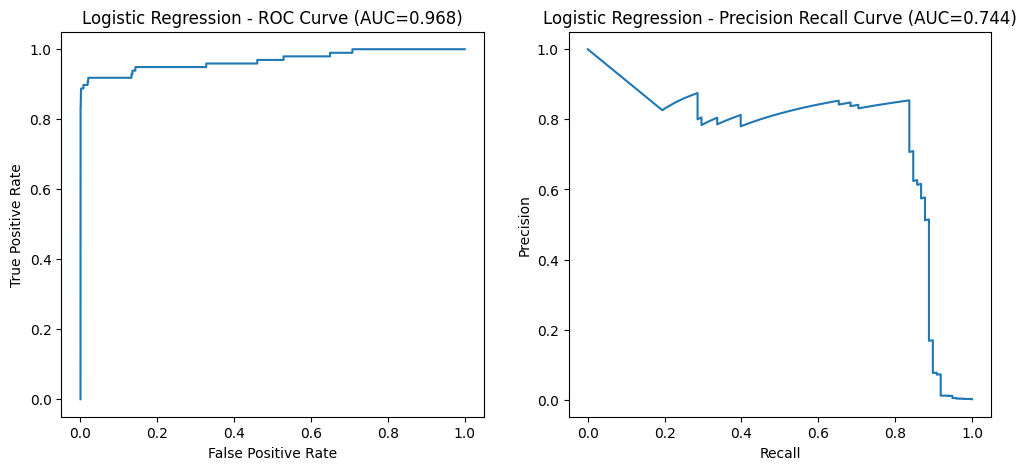

=== Random Forest ===
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8710    0.8265    0.8482        98

    accuracy                         0.9995     56962
   macro avg     0.9353    0.9132    0.9240     56962
weighted avg     0.9995    0.9995    0.9995     56962



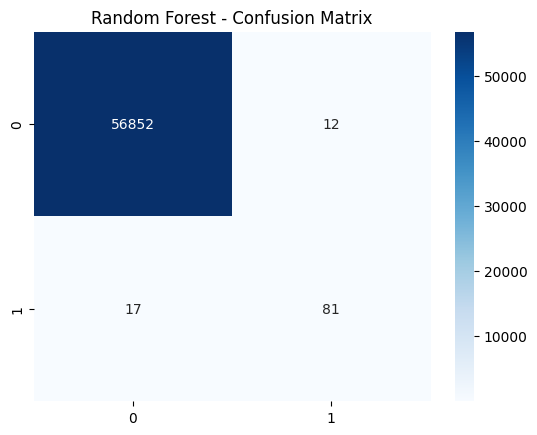

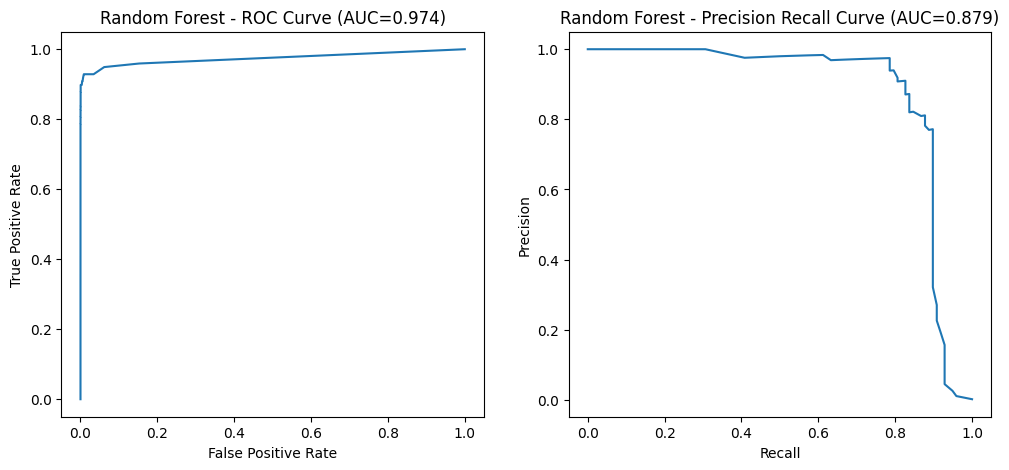

=== XGBoost ===
              precision    recall  f1-score   support

           0     0.9997    0.9995    0.9996     56864
           1     0.7615    0.8469    0.8019        98

    accuracy                         0.9993     56962
   macro avg     0.8806    0.9232    0.9008     56962
weighted avg     0.9993    0.9993    0.9993     56962



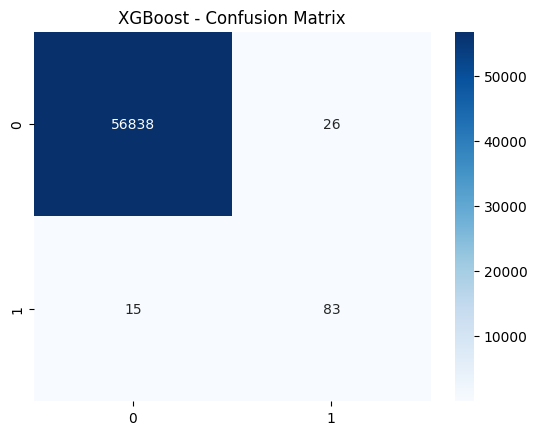

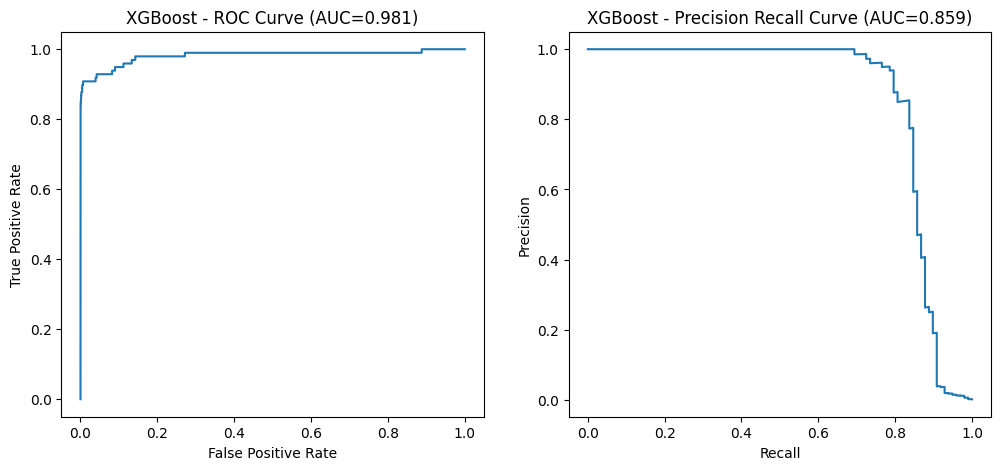

In [11]:
def evaluate(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr)
    plt.title(f"{name} - ROC Curve (AUC={roc_auc_score(y_test,y_prob):.3f})")
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')

    plt.subplot(1,2,2)
    plt.plot(rec, prec)
    plt.title(f"{name} - Precision Recall Curve (AUC={auc(rec,prec):.3f})")
    plt.xlabel('Recall'); plt.ylabel('Precision')
    plt.show()

evaluate(lr, X_test, y_test, "Logistic Regression")
evaluate(rf, X_test, y_test, "Random Forest")
evaluate(xgb_clf, X_test, y_test, "XGBoost")


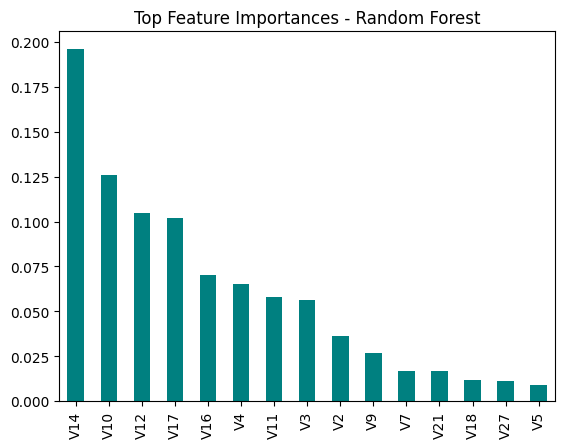

In [12]:
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:15]
imp.plot(kind='bar', color='teal')
plt.title('Top Feature Importances - Random Forest')
plt.show()


In [17]:
import joblib

model_path = r"C:\Users\Mala.VR\FraudDetectionProject\src\fraud_model.pkl"
joblib.dump(rf, model_path)
print("✅ Model saved at:", model_path)




✅ Model saved at: C:\Users\Mala.VR\FraudDetectionProject\src\fraud_model.pkl


In [18]:
import joblib
joblib.dump(scaler, r"C:\Users\Mala.VR\FraudDetectionProject\src\scaler.pkl")
print("✅ Scaler saved successfully!")


✅ Scaler saved successfully!
